<a href="https://colab.research.google.com/github/sijojoy186/LearnPython/blob/main/Projects/AustoAutomobiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Austo Automobiles Case Study**

## Exploratory Data Analysis for Extracting Insights



---



## **Data Overview**


The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

**Importing the libraries**




In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load the data**


In [21]:
df = pd.read_csv('/content/austo_automobile.csv')


**Check the structure of the data**

In [17]:
df.head()


,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [18]:
df.tail()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback
1580,22,Male,Salaried,Married,Graduate,4,No,No,No,31600,0.0,31600,31000,Hatchback


In [19]:
df.sample()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
865,28,Male,Business,Married,Post Graduate,4,No,No,Yes,80900,23700.0,104600,27000,Sedan


**Shape of the dataset**


In [23]:
df.shape

(1581, 14)

*The dataset has 1581 rows and 14 columns*

**Types of Data**

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


*The dataset has 6 numrical and 8 categorical columns*

**Check Duplicate / Missing values**


In [30]:
df.duplicated().sum()

np.int64(0)

*There are no duplicated rows*

In [31]:
df.isnull().sum()

,0
Age,0
Gender,53
Profession,0
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,0


- *The variable `Gender` and `PartneF_salary` have 53 and 106 missing values in them*
- *There are no missing values in other variables*

**Statistical Summary**

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1475.0,20225.559322,19573.149277,0.0,0.0,25600.0,38300.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


**Treating missing values**

In [32]:
df['Gender'].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [36]:
df['Gender'].value_counts()

,count
Gender,
Male,1199
Female,329


In [39]:
# replace wrong female value with the correct value.
df['Gender'] = df['Gender'].replace('Femle', 'Female')
df['Gender'] = df['Gender'].replace('Femal', 'Female')


In [40]:
# fill nan values with mode value
df.fillna({'Gender': df['Gender'].mode()[0]}, inplace=True)


- *The Gender value of female corrected for 2 values*
- *The Gender value of nan values replaced wtih mode value*

In [44]:
df['Gender'].value_counts()

,count
Gender,
Male,1252
Female,329


In [47]:
# 1. Impute Partner_salary with 0 where Partner_working is 'No' and Partner_salary is missing.
df.loc[(df['Partner_working'] == 'No') & (df['Partner_salary'].isnull()), 'Partner_salary'] = 0


In [48]:
# 2. Impute Partner_salary using the formula (Total_salary - Salary) where Partner_working is 'Yes' and Partner_salary is missing.
# The formula is Partner_salary = Total_salary - Salary
df.loc[(df['Partner_working'] == 'Yes') & (df['Partner_salary'].isnull()), 'Partner_salary'] = df['Total_salary'] - df['Salary']

- *Imputed 0 for partner not working*
- *Imputed Total sal - salary for Partner salary*

In [49]:
df.isnull().sum()

,0
Age,0
Gender,0
Profession,0
Marital_status,0
Education,0
No_of_Dependents,0
Personal_loan,0
House_loan,0
Partner_working,0
Salary,0


- *All the missing values treated*

 **Observations and Insights**

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1581.0,19233.776091,19670.391171,0.0,0.0,25100.0,38100.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


*   All the missing values and duplicates are
*   Data good to start with the further Analysis.
*   The buyers age is between 22 and 54.
*   The buyers dependent range from 0 to 4
*   The salary of the buyers range from 80k to 1.71 lakh
*   The price range between 18k to 70k







## **Univariate Analysis**

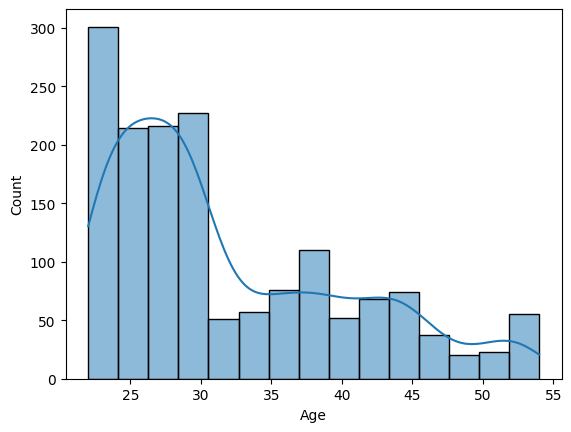

In [60]:
sns.histplot(data=df, x='Age',kde=True);


*Most of the buyers are of the range between 23 and 30*

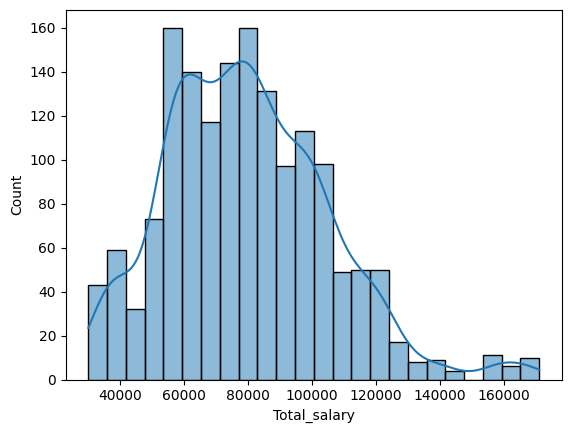

In [61]:
sns.histplot(data=df, x='Total_salary', kde=True);

*Very few buyers have total salary beyond 1.2 lakh*


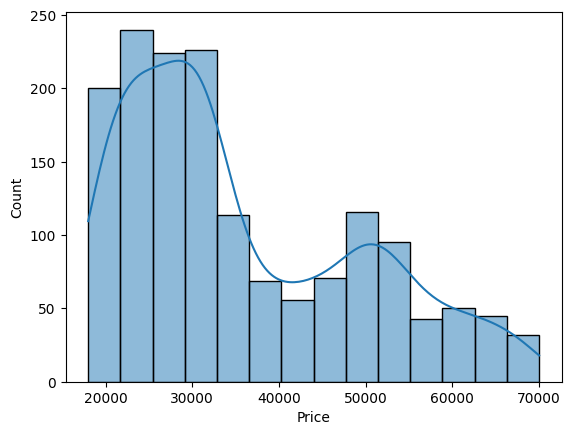

In [62]:
sns.histplot(data=df, x='Price', kde='true');

*The maximum number of cars are price between 20k to 30k*

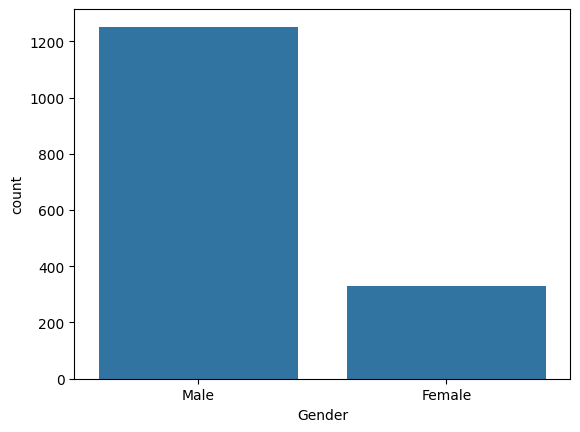

In [67]:
sns.countplot(data=df, x='Gender');

*The maximum buyers are Male*

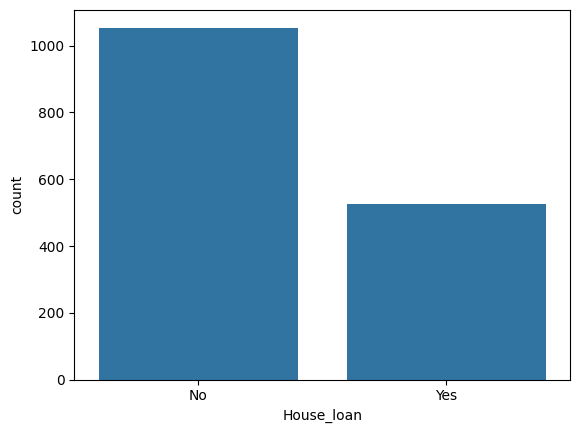

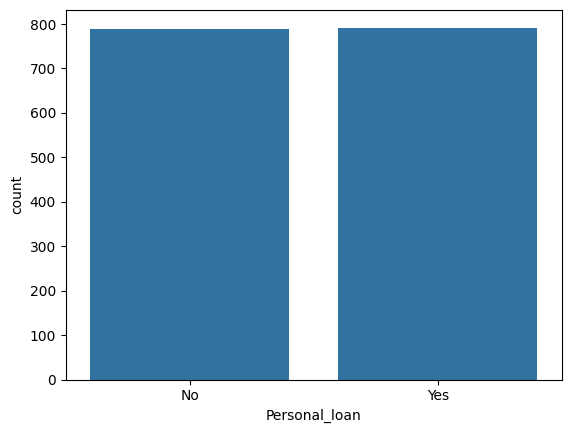

In [89]:
sns.countplot(data=df, x='House_loan')
plt.show()

sns.countplot(data=df, x='Personal_loan')
plt.show()

*The buyers having a house-loan is half the buyers to those not having house loan.*
*The buyers having personal-loan and not having are equal.*

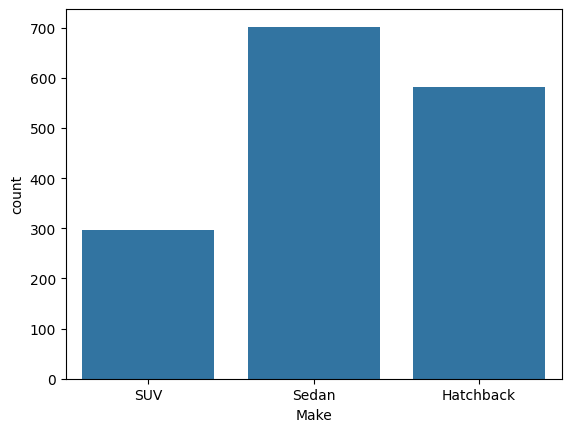

In [69]:
sns.countplot(data=df, x='Make');

*Maximum buyers prefer Sedan or Hatchback than SUV*

<Axes: xlabel='Profession', ylabel='count'>

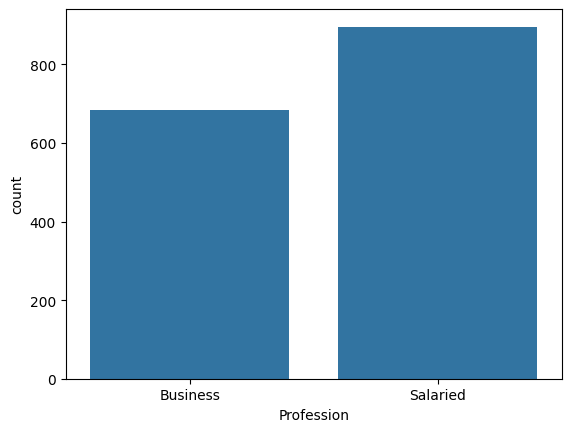

In [70]:
sns.countplot(data=df, x='Profession')

*Salaried buyers are more than business buyers*

<Axes: xlabel='Partner_working', ylabel='count'>

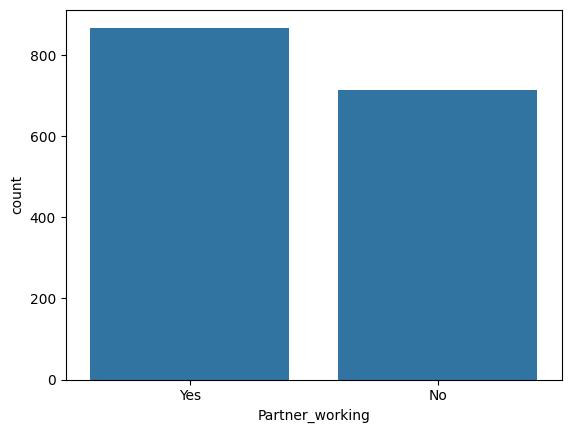

In [72]:
sns.countplot(data=df, x='Partner_working')

*Maximum buyers partner are working*

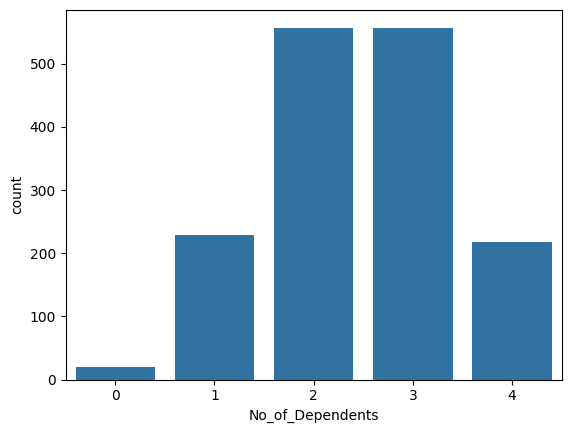

In [77]:
sns.countplot(data=df,x='No_of_Dependents');


*Most of the buyers have 2 to 3 dependents*

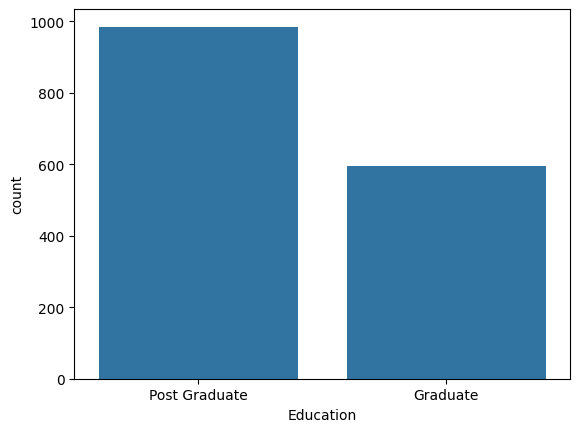

In [85]:
sns.countplot(data=df,x='Education');

*Most of the buyers are Post-Grad*

<Axes: xlabel='Marital_status', ylabel='count'>

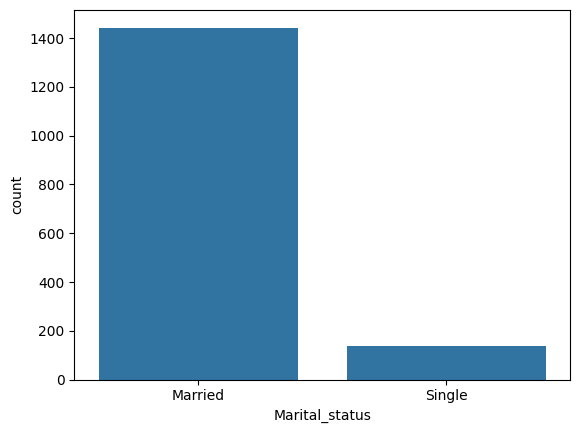

In [86]:
sns.countplot(data=df,x='Marital_status')

*Most of the buyers are Married*

## **Bivariate Analysis**

/tmp/ipython-input-3312160201.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,y='Salary', x='Gender', palette=['Pink','Cyan'], legend=False)


<Axes: xlabel='Gender', ylabel='Salary'>

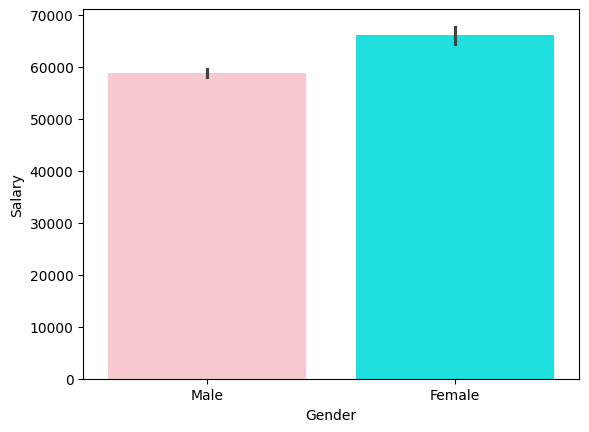

In [87]:
sns.barplot(data=df,y='Salary', x='Gender', palette=['Pink','Cyan'], legend=False)
